In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
from keras.datasets import mnist, fashion_mnist


Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [0]:
encoding_dim = 32 
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3491 - val_loss: 0.2708
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2627 - val_loss: 0.2511
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2405 - val_loss: 0.2280
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2202 - val_loss: 0.2104
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2054 - val_loss: 0.1982


In [0]:
pred = autoencoder.predict(x_test[[1],:])

INPUT IMAGE

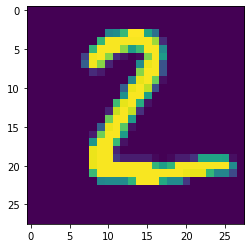

In [7]:
from matplotlib import pyplot as plt
plt.imshow(x_test[1].reshape(28,28))
plt.show()

AFTER ENCODING

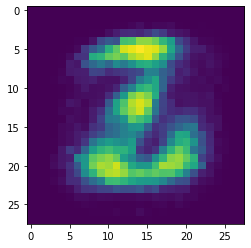

In [9]:
from matplotlib import pyplot as plt
plt.imshow(pred[0].reshape(28,28))
plt.show()

AFTER DECODING

In [0]:
pred1 = autoencoder.predict(x_test[1:])

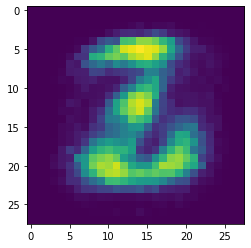

In [11]:
from matplotlib import pyplot as plt
plt.imshow(pred1[0].reshape(28,28))
plt.show()